<a href="https://colab.research.google.com/github/Palak0603/Roadmap-To-Become-Data-Analyst-2024/blob/main/Bank_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [122]:
df = pd.read_csv('/content/drive/MyDrive/Bank-Records.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
#Checking nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
#checking duplicates
np.sum(df.duplicated())

0

In [ ]:
## Descriptive Statistics
#Calculate mean, median, and mode for numerical columns
num_cols = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']
for col in num_cols:
    print(f"Column: {col}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode().values[0]:.2f}")
    print()

Column: CreditScore
Mean: 650.53
Median: 652.00
Mode: 850.00

Column: Age
Mean: 38.92
Median: 37.00
Mode: 37.00

Column: Balance
Mean: 76485.89
Median: 97198.54
Mode: 0.00

Column: NumOfProducts
Mean: 1.53
Median: 1.00
Mode: 1.00

Column: EstimatedSalary
Mean: 100090.24
Median: 100193.91
Mode: 24924.92

Column: Point Earned
Mean: 606.52
Median: 605.00
Mode: 408.00



In [ ]:
'''Insight:
    - The bank's customers have a good credit profile with a mean credit score of 650.53
    - They are primarily in their late 30s, with a mean age of 38.92
    - The customers have a significant amount of money in their accounts, with a mean balance of 76485.89
    - They have a high estimated salary, with a mean of 100090.24'''

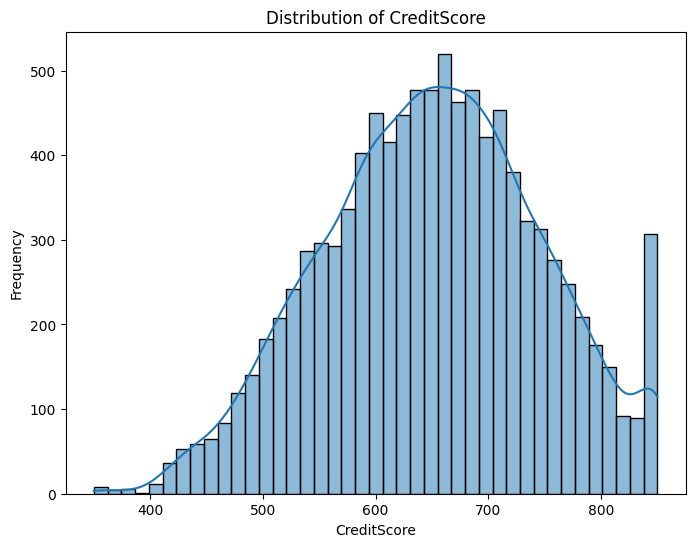

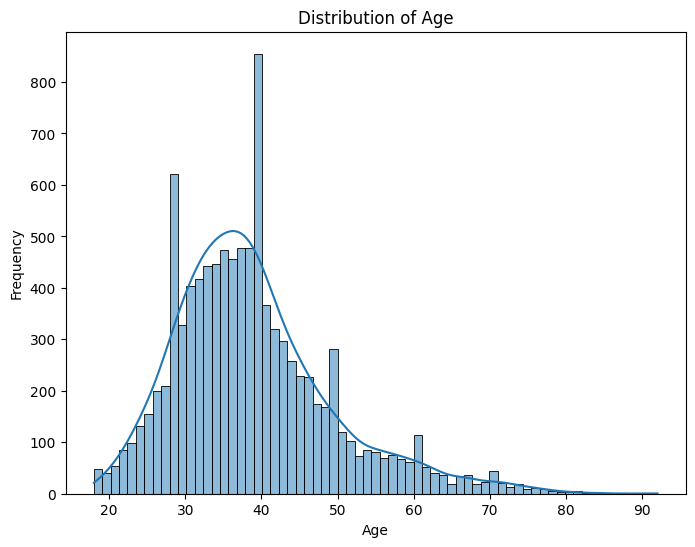

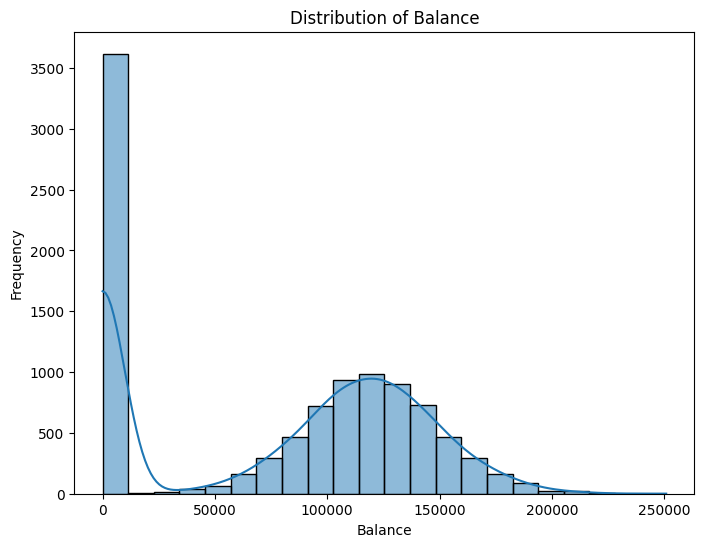

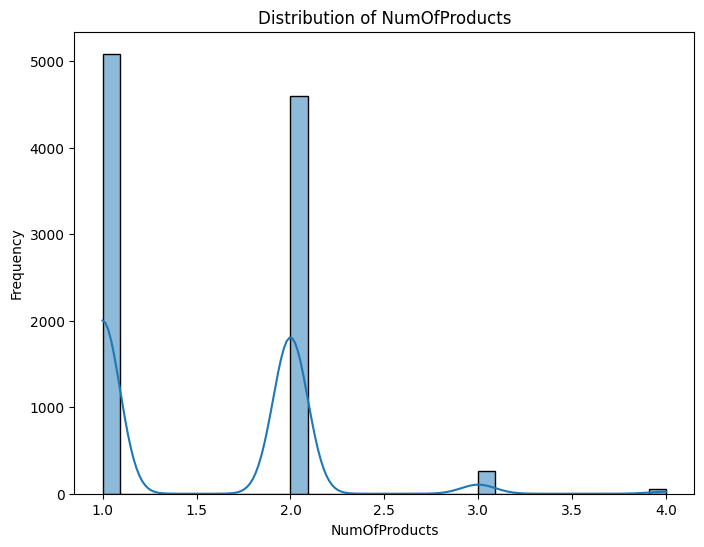

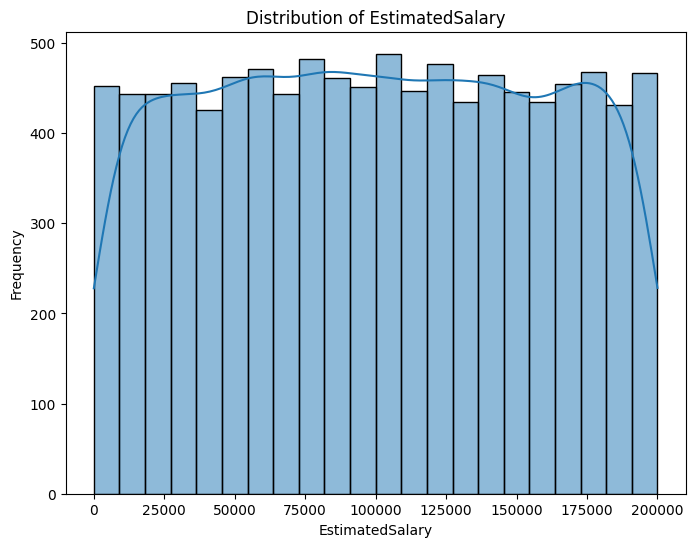

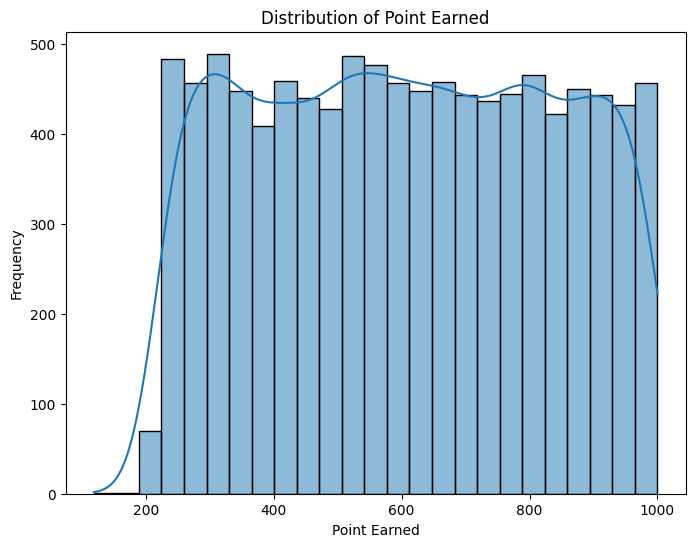

In [ ]:
#Analyze the distribution of key numerical variables using histograms
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

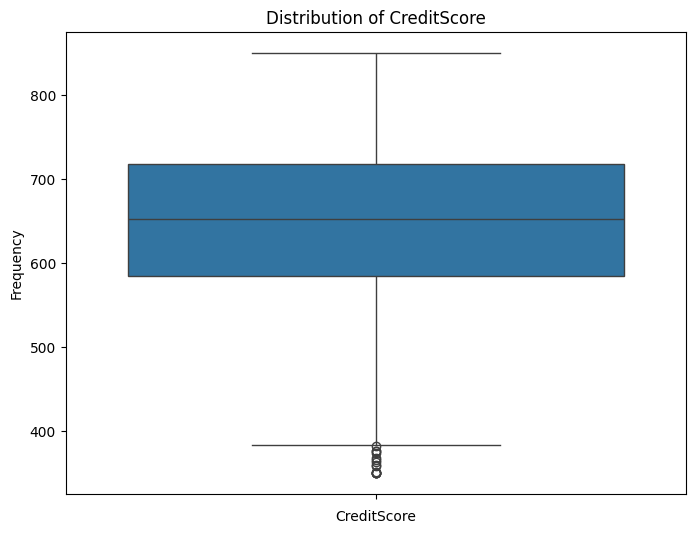

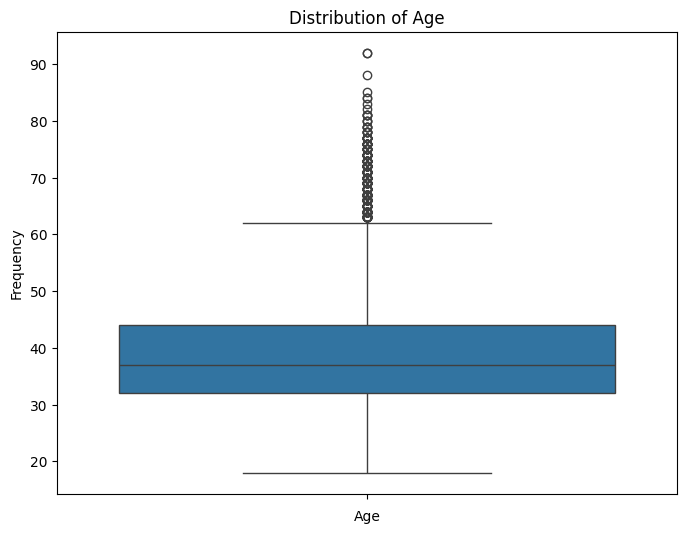

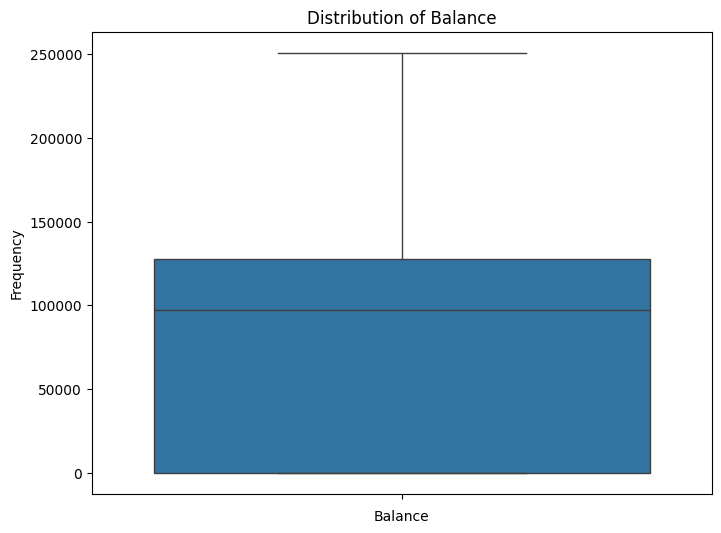

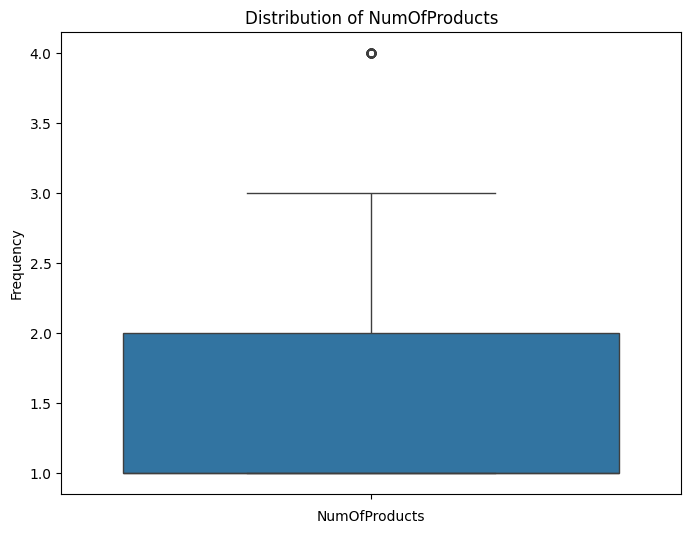

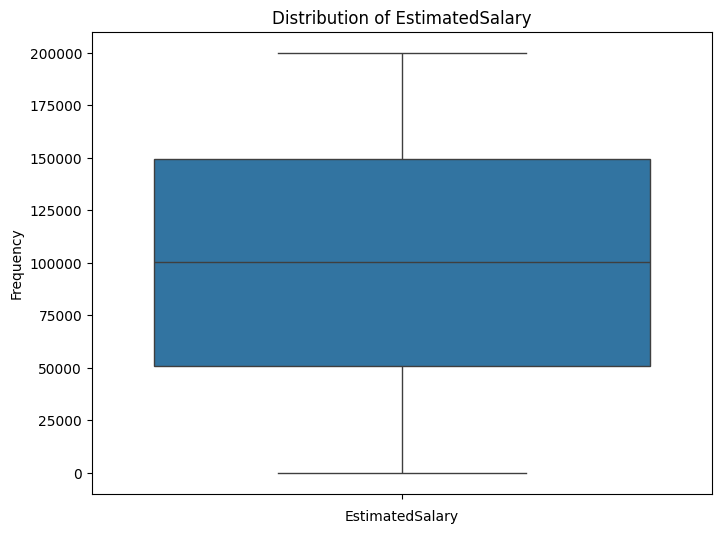

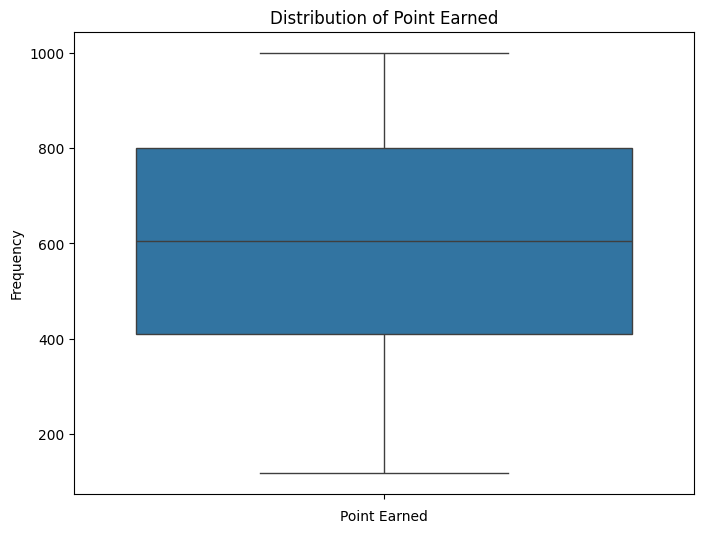

In [ ]:
#Analyze the distribution of key numerical variables using boxplot
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y = df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


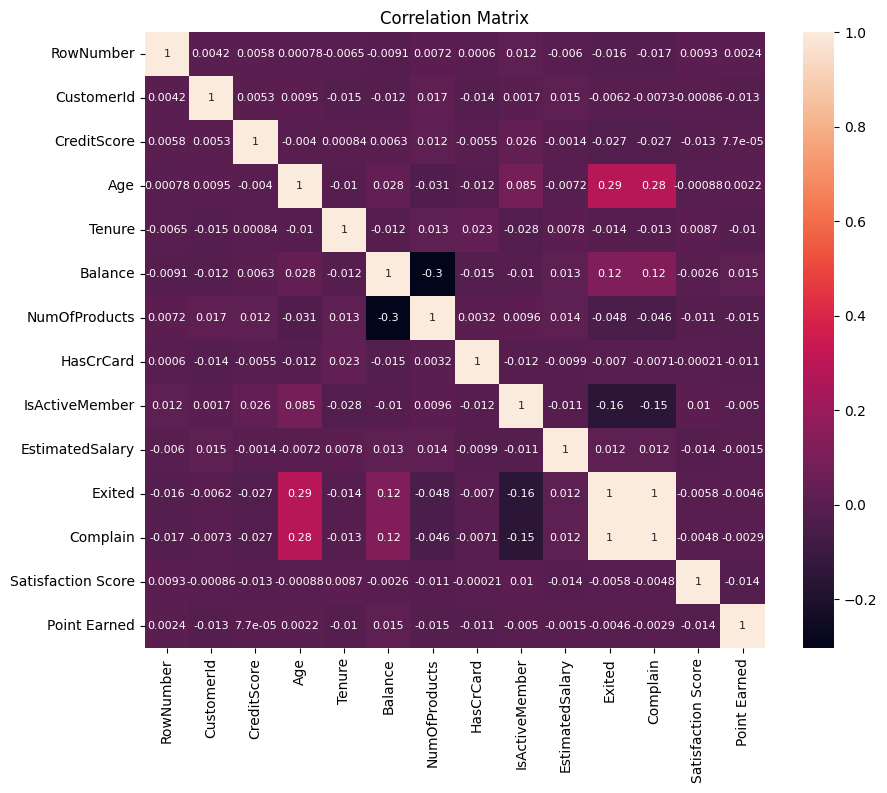

In [ ]:
## Exploratory Data Analysis (EDA)
#checking the correlation between numerical features and the Exited variable
num_df = df.select_dtypes(include=['number'])
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()


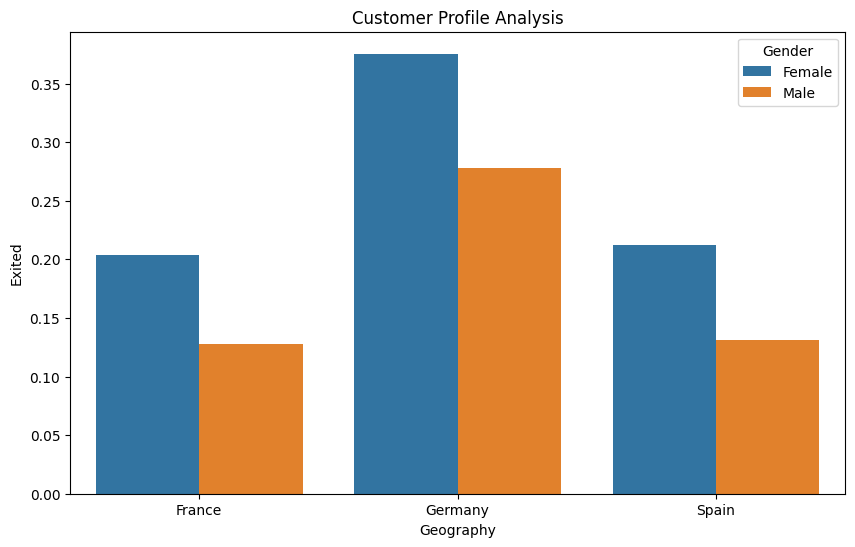

In [ ]:
#Segment customers based on key demographics (Age, Geography, Gender)
customer_profile = df.groupby(['Geography', 'Gender'])['Exited'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Geography', y='Exited', hue='Gender', data=customer_profile)
plt.title('Customer Profile Analysis')
plt.show()

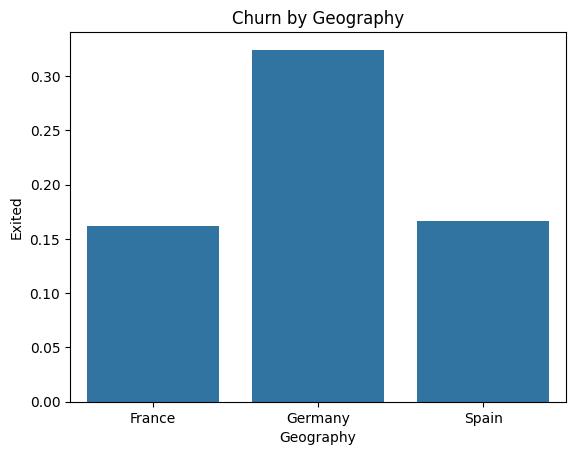

In [ ]:
##Comparative Analysis
#Comparing churn rates across different geographical locations
churn_by_geography = df.groupby('Geography')['Exited'].mean().reset_index()
sns.barplot(x='Geography', y='Exited', data=churn_by_geography)
plt.title('Churn by Geography')
plt.show()

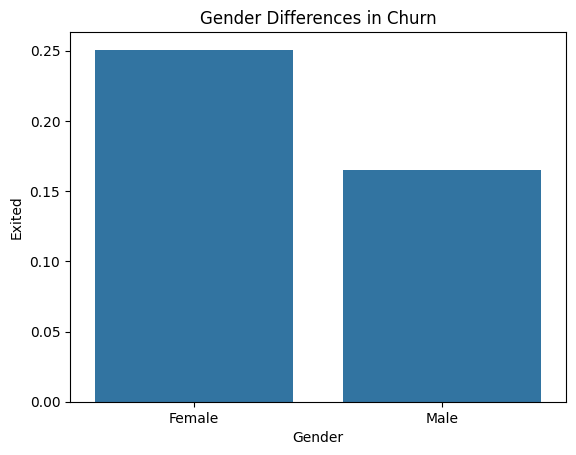

In [ ]:
#Analyzing churn rates between different genders
gender_differences = df.groupby('Gender')['Exited'].mean().reset_index()
sns.barplot(x='Gender', y='Exited', data=gender_differences)
plt.title('Gender Differences in Churn')
plt.show()

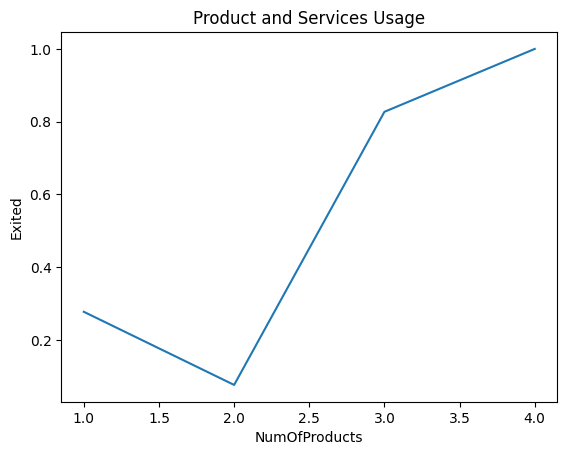

In [ ]:
## Behavioral Analysis
# Examine how the number of Num Of Products a customer uses affects their likelihood to churn
product_usage = df.groupby('NumOfProducts')['Exited'].mean().reset_index()
sns.lineplot(x='NumOfProducts', y='Exited', data=product_usage)
plt.title('Product and Services Usage')
plt.show()

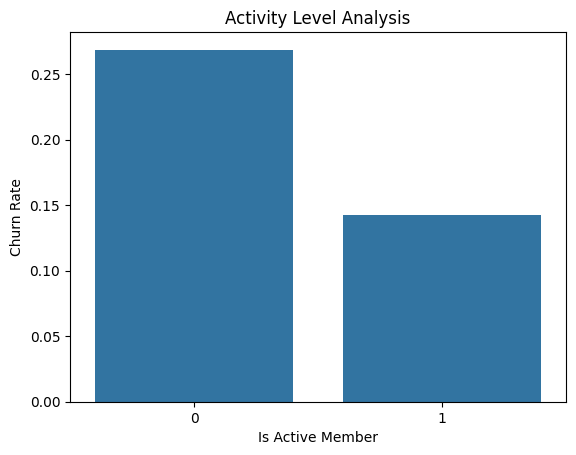

In [ ]:
# Investigate the relationship between being an IsActiveMember and customer churn
activity_level = df.groupby('IsActiveMember')['Exited'].mean().reset_index()
sns.barplot(x='IsActiveMember', y='Exited', data=activity_level)
plt.title('Activity Level Analysis')
plt.xlabel('Is Active Member')
plt.ylabel('Churn Rate')
plt.show()

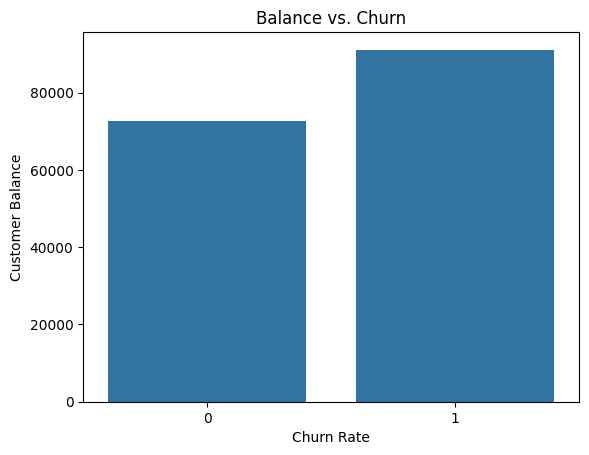

In [ ]:
## Financial Analysis
# Analyze how customer balance levels correlate with churn rates
balance_vs_churn = df.groupby('Exited')['Balance'].mean().reset_index()
sns.barplot(x='Exited', y='Balance', data=balance_vs_churn)
plt.title('Balance vs. Churn')
plt.xlabel('Churn Rate')
plt.ylabel('Customer Balance')
plt.show()


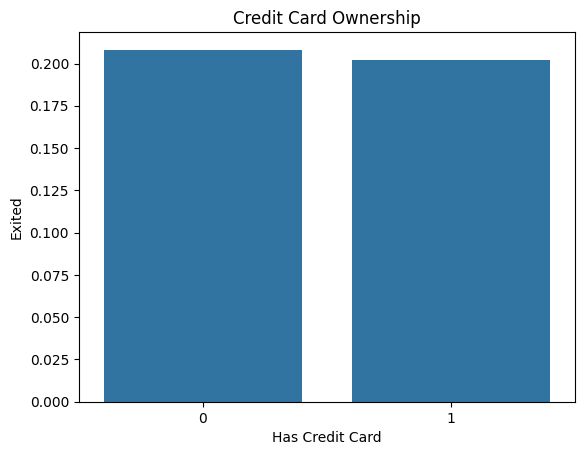

In [ ]:
# Determining own a credit card (HasCrCard) impacts customer loyalty
credit_card_ownership = df.groupby('HasCrCard')['Exited'].mean().reset_index()
sns.barplot(x='HasCrCard', y='Exited', data=credit_card_ownership)
plt.title('Credit Card Ownership')
plt.xlabel('Has Credit Card')
plt.ylabel('Exited')
plt.show()

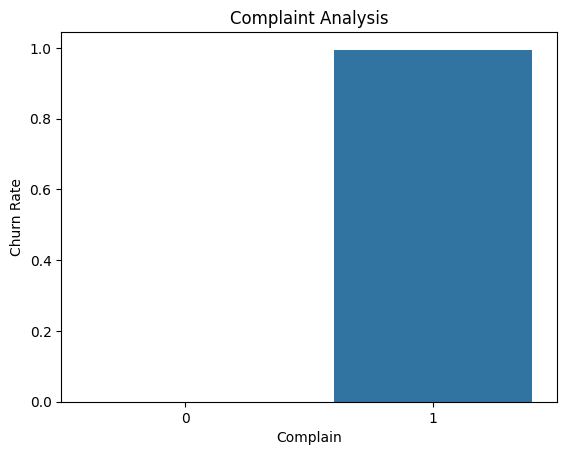

In [ ]:
## Customer Satisfaction and Feedback
# Study the impact of having a complaint (Complain) on customer churn
complaint_analysis = df.groupby('Complain')['Exited'].mean().reset_index()
sns.barplot(x='Complain', y='Exited', data=complaint_analysis)
plt.title('Complaint Analysis')
plt.xlabel('Complain')
plt.ylabel('Churn Rate')
plt.show()

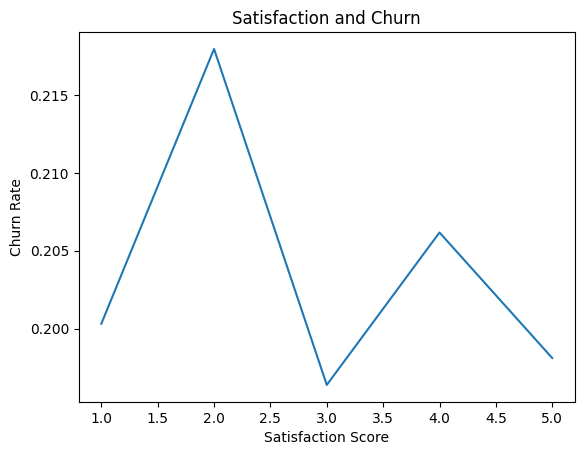

In [ ]:
# Exploring Satisfaction Score relates to churn,who have filed complaints
satisfaction_and_churn = df.groupby('Satisfaction Score')['Exited'].mean().reset_index()
sns.lineplot(x='Satisfaction Score', y='Exited', data=satisfaction_and_churn)
plt.title('Satisfaction and Churn')
plt.xlabel('Satisfaction Score')
plt.ylabel('Churn Rate')
plt.show()



Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


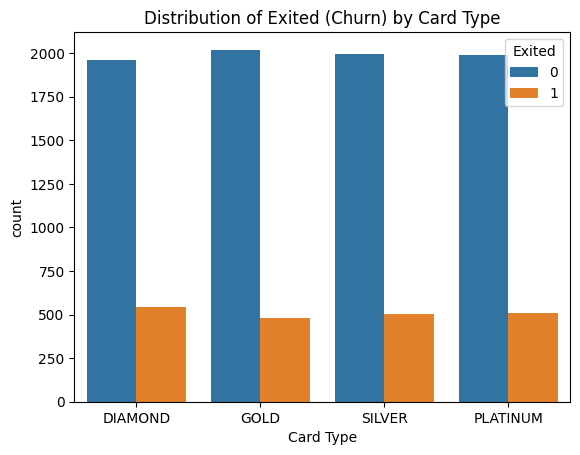

In [ ]:
## Card Usage Analysis
#  Examining different Card Types have different churn rates

# Summary statistics for Card Type
print(df['Card Type'].value_counts())

# Bar chart of Exited (churn) by Card Type
sns.countplot(x='Card Type', hue='Exited', data=df)
plt.title('Distribution of Exited (Churn) by Card Type')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table for Card Type and Exited (churn)
contingency_table = pd.crosstab(df['Card Type'], df['Exited'])

# Perform the chi-squared test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print('chi-squared statistic:', chi2)
print('p-value:', p_val)

chi-squared statistic: 5.053223027060927
p-value: 0.16794112067810177


In [ ]:
# Split the data into training and testing sets
X = pd.get_dummies(df, columns=['Card Type'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
lr_model = LogisticRegression()

# Convert all columns in X_train and X_test to numeric, coercing errors
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill any missing values created by the conversion with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

lr_model.fit(X_train, y_train)

# Print the coefficients and accuracy score
print('Coefficients:', lr_model.coef_)
print('Accuracy score:', lr_model.score(X_test, y_test))

Coefficients: [[-4.00651323e-07 -1.14532294e-07  0.00000000e+00 -2.30852201e-08
   0.00000000e+00  0.00000000e+00  2.38301566e-08 -2.77434922e-10
   4.80564572e-06 -9.04510398e-11 -1.69424281e-11 -6.23504911e-10
   5.48894646e-07  3.22493270e-09  3.21397772e-09 -2.40377531e-11
  -1.73920017e-08  0.00000000e+00  6.50176816e-11 -5.83157677e-11
  -1.35265070e-12 -5.45987611e-12]]
Accuracy score: 0.8035


In [ ]:
# Investigate whether Points Earned from credit card usage influence customer retention
Ho = 'There is not a significance difference in the mean of active and churned customers'
Ha = 'There is a significance difference in the mean of active and churned customers'

churned_customers = df[df['Exited'] == 1]
unchurned_customers = df[df['Exited'] == 0]

pval = ttest_ind(churned_customers['Point Earned'], unchurned_customers['Point Earned']).pvalue
print(f'P value: {pval}')

alpha= 1-0.95
if pval <= alpha:
  print(f'we reject null hypothesis: {Ha}')
else:
  print(f'we fail to reject null hypothesis: {Ho}')

P value: 0.6435350184288993
we fail to reject null hypothesis: There is not a significance difference in the mean of active and churned customers


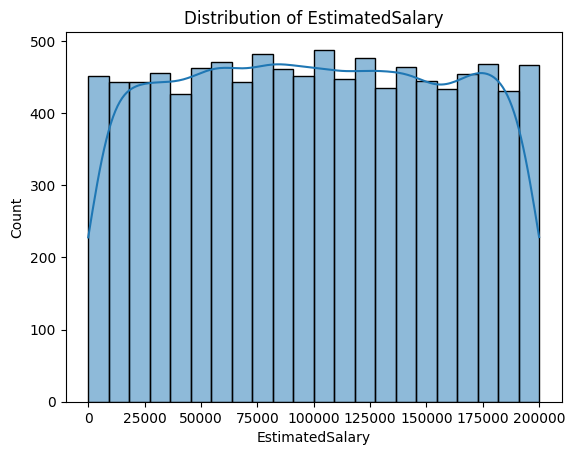

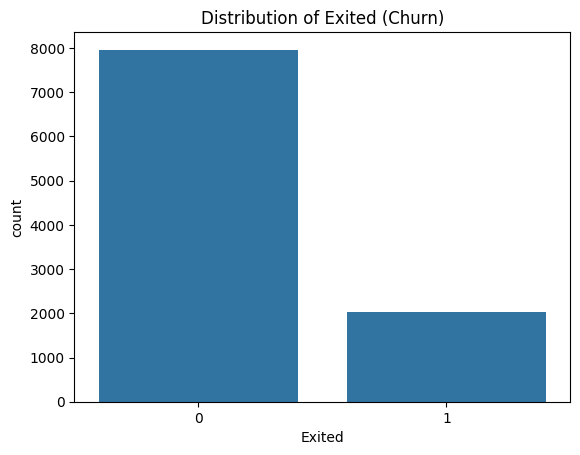

In [ ]:
## Salary Analysis
#Analyze the relationship between EstimatedSalary and customer churn
# Histogram of EstimatedSalary
sns.histplot(df['EstimatedSalary'], kde=True)
plt.title('Distribution of EstimatedSalary')
plt.show()

# Bar chart of Exited (churn)
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited (Churn)')
plt.show()

In [ ]:
churned_salaries = df[df['Exited'] == 1]['EstimatedSalary']
not_churned_salaries = df[df['Exited'] == 0]['EstimatedSalary']

# Perform the two-sample t-test
t_stat, p_val = ttest_ind(churned_salaries, not_churned_salaries)

print('t-statistic:', t_stat)
print('p-value:', p_val)

t-statistic: 1.2489445044833742
p-value: 0.2117146135149097


In [ ]:
from scipy.stats import t

# Calculate the confidence interval for the mean EstimatedSalary of churned customers
churned_ci = t.interval(0.95, len(churned_salaries) - 1, loc=np.mean(churned_salaries), scale=np.std(churned_salaries) / np.sqrt(len(churned_salaries)))
print('95% CI for mean EstimatedSalary of churned customers:', churned_ci)

# Calculate the confidence interval for the mean EstimatedSalary of not churned customers
not_churned_ci = t.interval(0.95, len(not_churned_salaries) - 1, loc=np.mean(not_churned_salaries), scale=np.std(not_churned_salaries) / np.sqrt(len(not_churned_salaries)))
print('95% CI for mean EstimatedSalary of not churned customers:', not_churned_ci)

95% CI for mean EstimatedSalary of churned customers: (98993.8502015364, 104025.96736470496)
95% CI for mean EstimatedSalary of not churned customers: (98465.93373663, 100987.77254571112)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df[['EstimatedSalary']]
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Print the coefficients and R-squared value
print('Coefficients:', lr_model.coef_)
print('R-squared:', lr_model.score(X_test, y_test))

Coefficients: [7.99436693e-08]
R-squared: -0.000264218603656996
